In [1]:
import pandas as pd
# import matplotlib_inline as plt
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_palette('pastel')
sns.set_style('darkgrid')
# sns.set_style('whitegrid')


In [2]:
EDA_pt = pd.read_csv('C:/Users/terra/BDSE29_learning data/期末專題/3.期末/3.探索性資料分析/JFK_17.csv')
EDA_pt

C:\Users\terra\AppData\Local\Temp\ipykernel_3556\3789532013.py:1: DtypeWarning: Columns (58) have mixed types. Specify dtype option on import or set low_memory=False.
  EDA_pt = pd.read_csv('C:/Users/terra/BDSE29_learning data/期末專題/3.期末/3.探索性資料分析/JFK_17.csv')


,airline_code,flight_num,tail_num,depa_airport,dest_airport,depa_year,depa_month,depa_date,sche_depa_hr,sche_depa_min,...,visibility,n_number,mfr_mdl_code,model,mfr_co,mfr_year,aircraft_type,eng_type,eng_no,seats_no
0,HA,51,360HA,JFK,HNL,2017,1,1,10,0,...,9.970,360HA,3940018,A330-243,AIRBUS,2016,5.0,5.0,2.0,377.0
1,HA,51,383HA,JFK,HNL,2017,1,2,10,0,...,9.970,383HA,3940018,A330-243,AIRBUS,2011,5.0,5.0,2.0,377.0
2,HA,51,375HA,JFK,HNL,2017,1,3,10,0,...,2.245,375HA,3940018,A330-243,AIRBUS,2015,5.0,5.0,2.0,377.0
3,HA,51,373HA,JFK,HNL,2017,1,4,10,0,...,9.500,373HA,3940018,A330-243,AIRBUS,2014,5.0,5.0,2.0,377.0
4,HA,51,370HA,JFK,HNL,2017,1,5,10,0,...,10.000,370HA,3940018,A330-243,AIRBUS,2014,5.0,5.0,2.0,377.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102073,VX,1399,852VA,JFK,LAX,2017,12,31,7,0,...,10.000,852VA,3940006,A320-214,AIRBUS,2012,5.0,5.0,2.0,182.0
102074,VX,1407,846VA,JFK,LAX,2017,12,31,9,15,...,10.000,846VA,3940006,A320-214,AIRBUS,2011,5.0,5.0,2.0,182.0
102075,VX,1409,642VA,JFK,LAX,2017,12,31,11,30,...,10.000,642VA,3940006,A320-214,AIRBUS,2008,5.0,5.0,2.0,182.0
102076,VX,1411,633VA,JFK,LAX,2017,12,31,13,0,...,10.000,633VA,3940006,A320-214,AIRBUS,2007,5.0,5.0,2.0,182.0


In [9]:
type(EDA_pt.iloc[8919,2])

str

In [10]:
EDA_pt.isna().sum()

airline_code         0
flight_num           0
tail_num             0
depa_airport         0
dest_airport         0
                 ...  
mfr_year         14319
aircraft_type    14319
eng_type         14319
eng_no           14319
seats_no         14319
Length: 66, dtype: int64

In [3]:
EDA_pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102078 entries, 0 to 102077
Data columns (total 66 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   airline_code             102078 non-null  object 
 1   flight_num               102078 non-null  int64  
 2   tail_num                 102078 non-null  object 
 3   depa_airport             102078 non-null  object 
 4   dest_airport             102078 non-null  object 
 5   depa_year                102078 non-null  int64  
 6   depa_month               102078 non-null  int64  
 7   depa_date                102078 non-null  int64  
 8   sche_depa_hr             102078 non-null  int64  
 9   sche_depa_min            102078 non-null  int64  
 10  actu_depa_hr             102078 non-null  int64  
 11  actu_depa_min            102078 non-null  int64  
 12  dest_year                102078 non-null  int64  
 13  dest_month               102078 non-null  int64  
 14  dest

In [14]:
## 取得出勤航班
#篩掉取消航班，留下真的有飛的航班
EDA_pt_act=EDA_pt[EDA_pt['actu_depa_hr'] + EDA_pt['actu_depa_min'] != 0]
EDA_pt_act.shape
# EDA_pt_act.describe().T

(99980, 66)

In [17]:
## 取得出勤航班數
# 以航空公司分組，檢視每間航空公司實際出勤航班數
total_flights = EDA_pt_act.groupby('airline_code').count()[['flight_num']]
total_flights
# total_flights.index

,flight_num
airline_code,
AA,17878
AS,417
B6,44860
DL,31805
HA,351
VX,4669


In [13]:
## 取得delay航班數
#先篩選出有delay的出勤航班 再以航空公司分組
delay_counts = EDA_pt_act[EDA_pt_act['delay_total_time']>0].groupby('airline_code').count()[['flight_num']]
delay_counts

,flight_num
airline_code,
AA,7094
AS,130
B6,18213
DL,10355
HA,130
VX,1972


In [46]:
## 計算誤點率
#計算每間航空公司的誤點率
delay_rates = delay_counts / total_flights
delay_rates=delay_rates.reset_index(drop=False)
delay_rates= delay_rates.rename(columns={'flight_num':'delay_rates'})
delay_rates = delay_rates.sort_values('delay_rates')
delay_rates 

,airline_code,delay_rates
1,AS,0.311751
3,DL,0.325578
4,HA,0.370370
0,AA,0.396801
2,B6,0.405996
5,VX,0.422360


In [51]:
## 篩選想看的標的
#選出名列前20大的航空公司來比一比
filt_value = ['AA', 'DL', 'VX','B6','AS','HA']
filt = delay_rates["airline_code"].isin(filt_value)
delay_rates_out=delay_rates[filt]

<Axes: xlabel='airline_code', ylabel='delay_rates'>

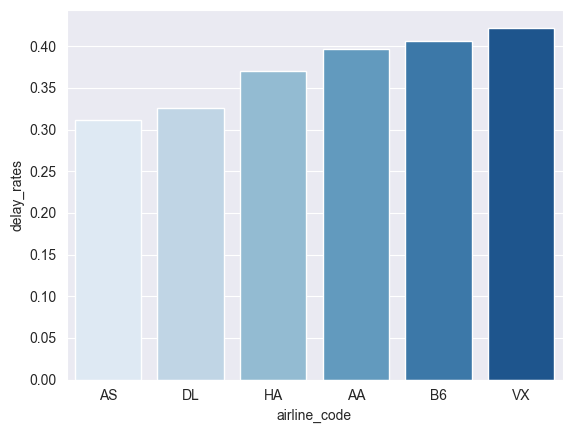

In [52]:
## 繪圖
#以seaborn 劃出長條圖 
#palette="Blues" 可以設定為同一顏色 並漸層 
#不設定顏色 套件會自動選色 一人一色
sns.barplot(data = delay_rates_out , x="airline_code" , y="delay_rates", palette="Blues")

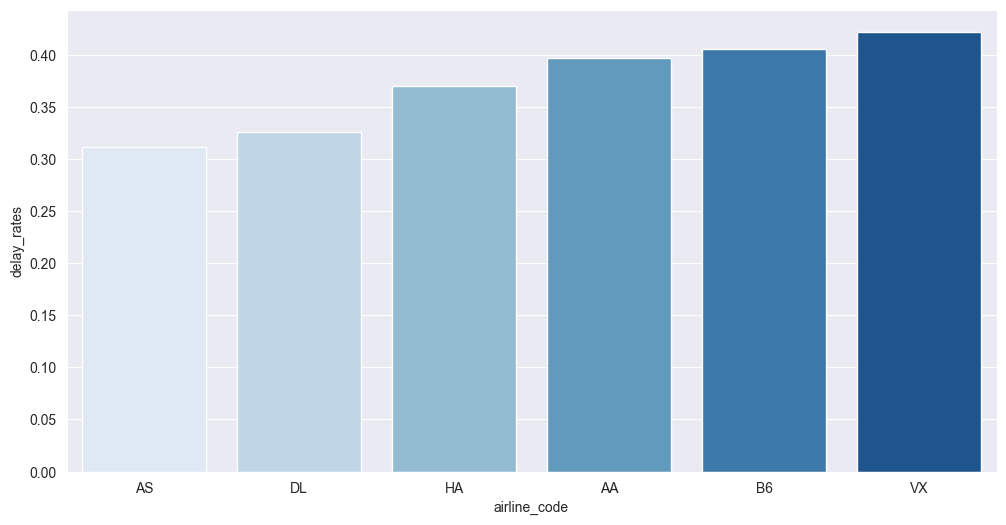

In [53]:
##存出圖表

#设置一个（12，6）的画布
plt.figure(figsize=(12, 6))

#图形绘制代码
sns.barplot(data = delay_rates_out , x="airline_code" , y="delay_rates", palette="Blues")

#将画布保存为'xiang.png'，还可以保存为jpg、svg格式图片
plt.savefig('Top20 最會delay 航空公司.png')

In [ ]:
#######################################################

In [16]:
sns.displot(data=test, x=test[['delay_total_time']],bins=5)

ValueError: If using all scalar values, you must pass an index

C:\Users\terra\AppData\Local\Temp\ipykernel_16460\2718048429.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test.corr())


<Axes: >

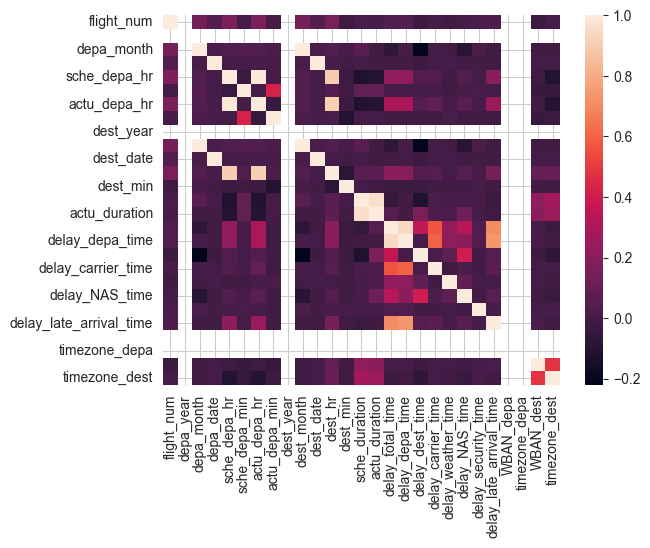

In [17]:
sns.heatmap(test.corr())